# 4量子ビットのグローバーのアルゴリズム

In [1]:
#Import Qiskit and Visualization Tools
from qiskit import QuantumCircuit, execute, BasicAer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

#Initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import pi

In [2]:
#preparation of quantum circuit
qc = QuantumCircuit(4,4)

In [3]:
#create superposition
qc.h(0) 
qc.h(1) 
qc.h(2) 
qc.h(3)

In [4]:
#create oracle for 0011
qc.x(2) 
qc.x(3)

qc.cu1(pi/4,0,3)
qc.cx(0, 1)
qc.cu1(-pi/4, 1, 3)
qc.cx(0, 1)
qc.cu1(pi/4, 1, 3) 
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3) 
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3) 
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3) 
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3)

qc.x(2) 
qc.x(3)

In [5]:
#create amplitude amplification circuit
qc.h(0)
qc.h(1) 
qc.h(2) 
qc.h(3)
qc.x(0) 
qc.x(1)
qc.x(2) 
qc.x(3)

qc.cu1(pi/4,0,3) 
qc.cx(0,1)
qc.cu1(-pi/4,1,3) 
qc.cx(0,1)
qc.cu1(pi/4, 1, 3) 
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3) 
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3) 
qc.cx(1, 2)
qc.cu1(-pi/4, 2, 3) 
qc.cx(0, 2)
qc.cu1(pi/4, 2, 3) 

qc.x(0) 
qc.x(1) 
qc.x(2) 
qc.x(3)
qc.h(0) 
qc.h(1) 
qc.h(2) 
qc.h(3)

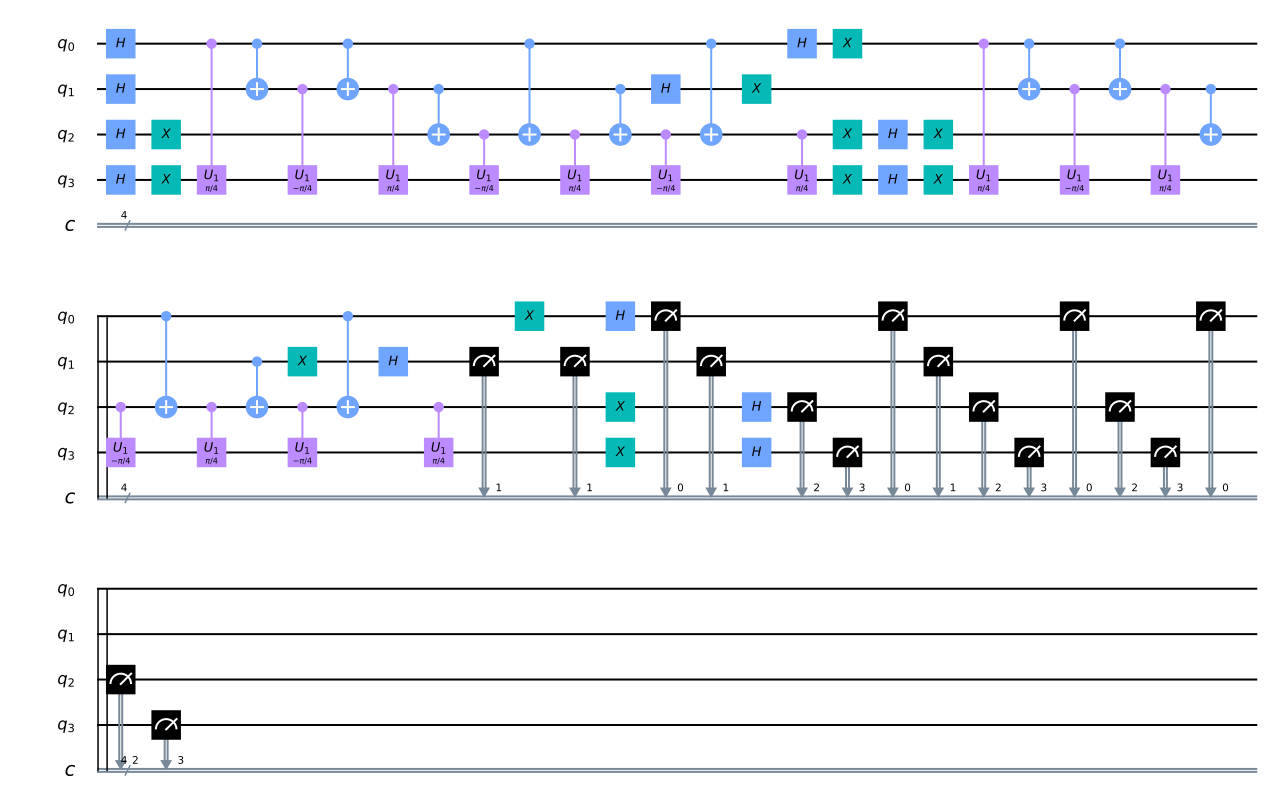

In [11]:
#add measurement
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.measure(3, 3)
qc.draw()

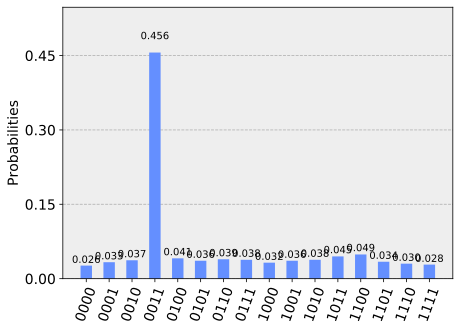

In [9]:
#Plot histogram of execution results
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)